In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
health_care = pd.read_csv("healthcare_dataset.csv")
health_care_df = pd.DataFrame(health_care)
health_care_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# <span style="color:red">Drop ID column</span>

In [3]:
health_care_df = health_care_df.drop(columns=['id'])

In [4]:
health_care_df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [5]:
health_care_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4854.000000,5110.000000,5110.000000,4854.000000,4665.000000,5110.000000
mean,43.230128,0.097456,0.054012,106.108706,28.906409,0.048728
std,22.587873,0.296607,0.226063,45.310290,7.863326,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.232500,23.600000,0.000000
50%,45.000000,0.000000,0.000000,91.820000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.142500,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
health_care_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                4854 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          4957 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  4854 non-null   float64
 8   bmi                4665 non-null   float64
 9   smoking_status     4957 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [7]:
health_care_df.isnull().sum()

gender                 0
age                  256
hypertension           0
heart_disease          0
ever_married           0
work_type            153
Residence_type         0
avg_glucose_level    256
bmi                  445
smoking_status       153
stroke                 0
dtype: int64

In [8]:
health_care_df.duplicated().sum()

np.int64(167)

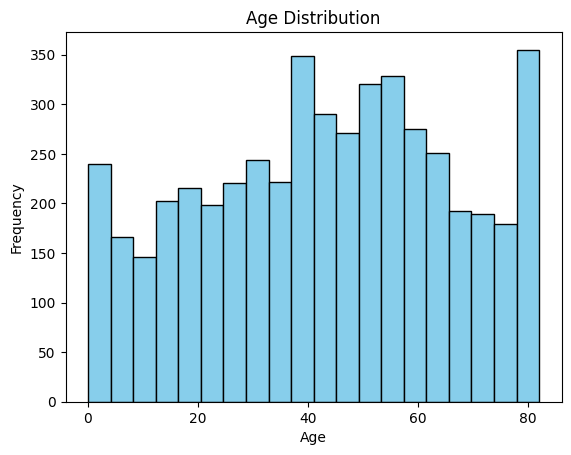

In [9]:
plt.hist(health_care_df['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

In [10]:
health_care_df['age'] = health_care_df['age'].round()

In [11]:
health_care_df['age'].unique()

array([67., 61., 80., 49., 79., 81., 74., 69., nan, 78., 54., 50., 64.,
       75., 60., 57., 71., 52., 65., 58., 42., 82., 48., 72., 63., 76.,
       39., 77., 73., 56., 45., 70., 59., 66., 51., 68., 47., 53., 38.,
       55.,  1., 46., 32., 14.,  3.,  8., 37., 40., 35., 20., 44., 25.,
       23., 17., 13.,  4., 16., 22., 27., 43., 30., 29., 11., 21., 18.,
       33., 24., 34., 36., 41.,  5., 26., 31., 12., 62.,  2.,  7.,  9.,
       15., 28., 10.,  0., 19.,  6.])

In [12]:
health_care_df['age'] = health_care_df['age'].fillna(health_care_df['age'].mean())

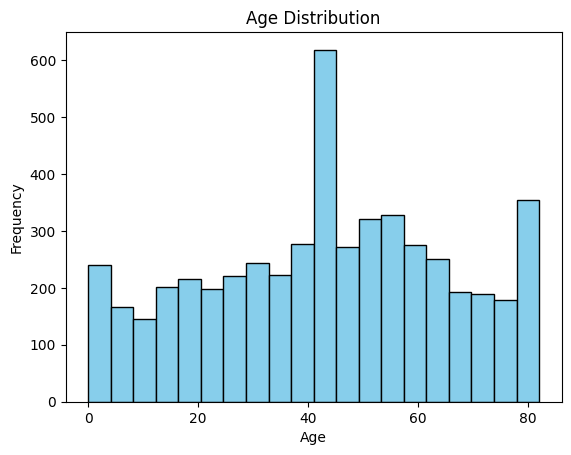

In [13]:
plt.hist(health_care_df['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

In [14]:
health_care_df['work_type'].unique()

array(['Private', 'Self-employed', nan, 'Govt_job', 'children',
       'Never_worked'], dtype=object)

In [15]:
health_care_df['work_type'].value_counts()

work_type
Private          2840
Self-employed     793
children          662
Govt_job          640
Never_worked       22
Name: count, dtype: int64

In [16]:
health_care_df['work_type'].isnull().sum()

np.int64(153)

In [17]:
health_care_df['work_type'] = health_care_df['work_type'].fillna(health_care_df['work_type'].mode()[0])

In [18]:
health_care_df['work_type'].isnull().sum()

np.int64(0)

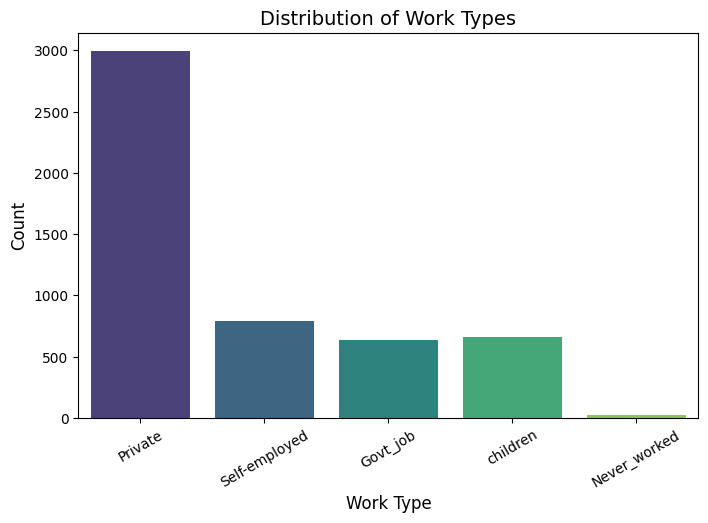

In [19]:
plt.figure(figsize=(8,5))


sns.countplot(x='work_type', data=health_care_df, palette='viridis', hue='work_type', legend=False)

plt.title("Distribution of Work Types", fontsize=14)
plt.xlabel("Work Type", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.xticks(rotation=30)

plt.show()

In [20]:
health_care_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  4854 non-null   float64
 8   bmi                4665 non-null   float64
 9   smoking_status     4957 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [21]:
health_care_df["avg_glucose_level"] = health_care_df["avg_glucose_level"].fillna(health_care_df["avg_glucose_level"].median())

In [22]:
health_care_df['avg_glucose_level'].describe()

count    5110.000000
mean      105.392873
std        44.270397
min        55.120000
25%        77.930000
50%        91.820000
75%       112.325000
max       271.740000
Name: avg_glucose_level, dtype: float64

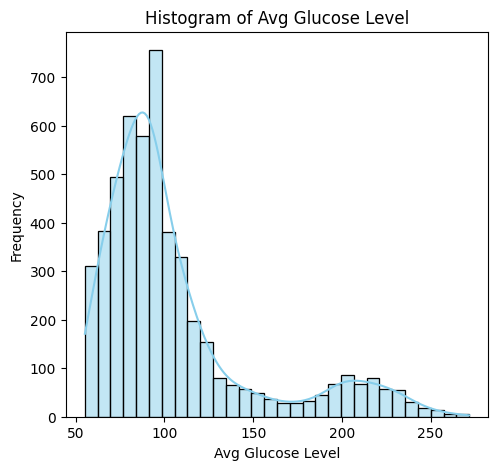

<Figure size 600x500 with 0 Axes>

In [23]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(health_care_df['avg_glucose_level'], bins=30, kde=True, color='skyblue')
plt.title("Histogram of Avg Glucose Level")
plt.xlabel("Avg Glucose Level")
plt.ylabel("Frequency")
plt.figure(figsize=(6,5))
plt.tight_layout()
plt.show()


In [24]:
health_care_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4665 non-null   float64
 9   smoking_status     4957 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [25]:
health_care_df['bmi'] = health_care_df['bmi'].fillna(health_care_df['bmi'].median())

In [26]:
Q1 = health_care_df['bmi'].quantile(0.25)
Q3 = health_care_df['bmi'].quantile(0.75)
IQR = Q3 - Q1
l = Q1 - 1.5 * IQR
u = Q3 + 1.5 * IQR
print(l)
print(u)
outliers = (health_care_df['bmi']<l) |(health_care_df['bmi']>u)
health_care_df['bmi'] = np.where(outliers, health_care_df['bmi'].median(), health_care_df['bmi'])

11.500000000000004
45.099999999999994


In [27]:
health_care_df['bmi'].describe()

count    5110.000000
mean       28.161448
std         6.242514
min        12.000000
25%        24.100000
50%        28.100000
75%        31.800000
max        45.000000
Name: bmi, dtype: float64

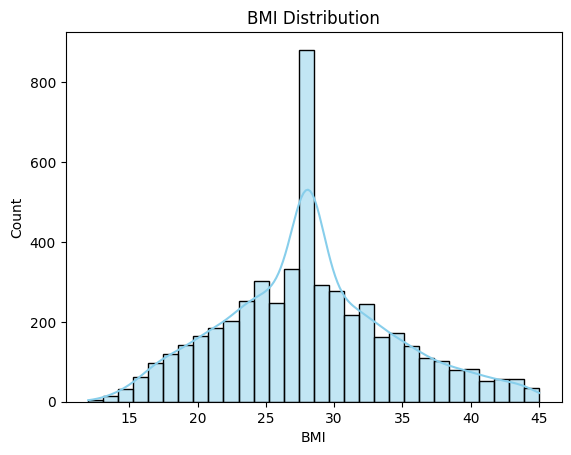

In [28]:
sns.histplot(health_care_df['bmi'], bins=30, kde=True, color='skyblue')
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()


In [29]:
health_care_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                    0
smoking_status       153
stroke                 0
dtype: int64

In [30]:
health_care_df['smoking_status'].value_counts()

smoking_status
never smoked       1835
Unknown            1492
formerly smoked     864
smokes              766
Name: count, dtype: int64

In [31]:
health_care_df.loc[health_care_df['age'] < 16, 'smoking_status'] = "never smoked"

In [32]:
health_care_df['smoking_status'].value_counts()

smoking_status
never smoked       2455
Unknown             894
formerly smoked     845
smokes              763
Name: count, dtype: int64

In [33]:
health_care_df['smoking_status']=health_care_df['smoking_status'].fillna("Unknown")

In [34]:
health_care_df['smoking_status'].value_counts()

smoking_status
never smoked       2455
Unknown            1047
formerly smoked     845
smokes              763
Name: count, dtype: int64

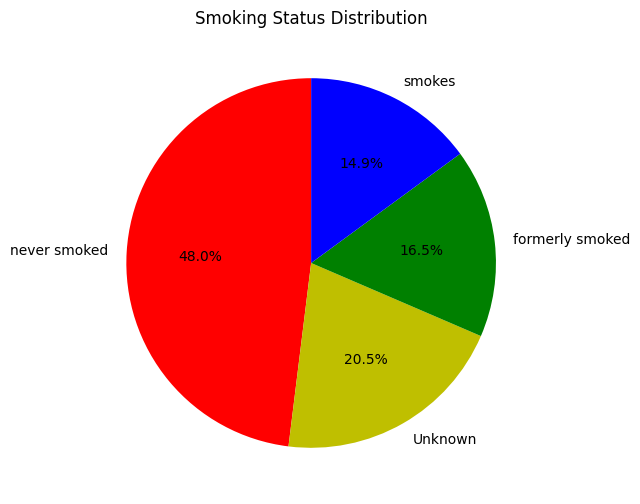

In [35]:
health_care_df['smoking_status'].value_counts().plot.pie(autopct='%1.1f%%', colors=["r","y","g","b"], startangle=90, figsize=(6,6))
plt.title("Smoking Status Distribution")
plt.ylabel("") 
plt.show()

In [36]:
health_care_df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [37]:
health_care_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.230326,0.097456,0.054012,105.392873,28.161448,0.048728
std,22.014411,0.296607,0.226063,44.270397,6.242514,0.215320
min,0.000000,0.000000,0.000000,55.120000,12.000000,0.000000
25%,26.000000,0.000000,0.000000,77.930000,24.100000,0.000000
50%,43.230326,0.000000,0.000000,91.820000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,112.325000,31.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,45.000000,1.000000


# <span style="color:Green">Save The New Data</span>

In [38]:
health_care_df.to_csv("cleaned_data_1.csv", index=False)